In [1]:
# Importations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

import string
import nltk
import re
#nltk.download('stopwords')

from wordcloud import WordCloud
from collections import Counter, OrderedDict

# Fonctions
from NLP_functions import maj_count, maj_count2

# Visualisation du dataset

Dataset: https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

Il fournit des phrases financières avec des étiquettes de sentiment.

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
print(df.shape)

(5842, 2)


In [4]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

# Répartition des Sentiments (positive, negative, neutral)

In [5]:
df.Sentiment.value_counts(normalize = True)

neutral     0.535775
positive    0.317015
negative    0.147210
Name: Sentiment, dtype: float64

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


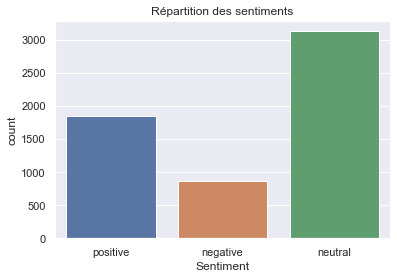

In [6]:
sns.set_theme(style="darkgrid")
sns.countplot(df.Sentiment)
plt.title("Répartition des sentiments")
plt.show()

On constate que la répartition n'est pas équilibrée, donc biais dans notre jeu de donnée. Un modèle pourra plus facilement prédire un sentiment neutre voire positif que négatif.    

Réflexion: augmenter les caractéristiques entrées dans notre modèle pour affiner sa prédiction.

# Words Cloud par Sentiment

In [7]:
# initialiser les stop words 
stop_words = set(nltk.corpus.stopwords.words('english'))

# Positive sentiment
df_positive = df[df.Sentiment == "positive"]
print("{} Positive Sentiment".format(df_positive.shape[0]))

# Negative sentiment
df_negative = df[df.Sentiment == "negative"]
print("{} Negative Sentiment".format(df_negative.shape[0]))

# Neutral sentiment
df_neutral = df[df.Sentiment == "neutral"]
print("{} Neutral Sentiment".format(df_neutral.shape[0]))

1852 Positive Sentiment
860 Negative Sentiment
3130 Neutral Sentiment


### Word Clouds

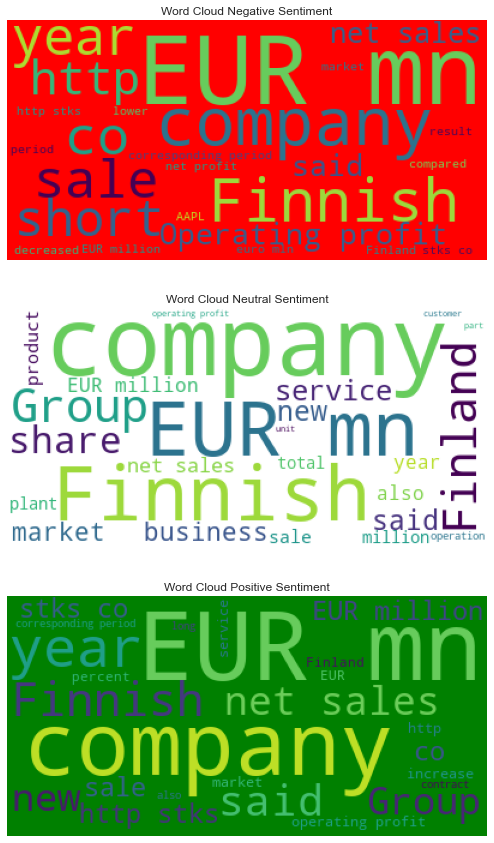

In [8]:
# Compiler tous les messages positifs dans une chaine de caractères
positive_text = ""
for comment in df_positive.Sentence:
    positive_text += comment
# Instancier le calque du nuage de mot 
wc_p = WordCloud(background_color = 'green', 
                 max_words = 25,            
                 stopwords = stop_words,   
                 max_font_size = 80,         
                 random_state = 123)

# Messages négatifs
negative_text = ""
for comment in df_negative.Sentence:
    negative_text += comment
wc_neg = WordCloud(background_color = 'red',
                   max_words = 25,            
                   stopwords = stop_words,   
                   max_font_size = 80,         
                   random_state = 123)

# Messages neutres
neutral_text = ""
for comment in df_neutral.Sentence:
    neutral_text += comment   
wc = WordCloud(background_color = 'white', 
               max_words = 25,           
               stopwords = stop_words,   
               max_font_size = 80,        
               random_state = 123)

# Affichage des words clouds
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
wc_neg.generate(negative_text)
plt.axis("off")
plt.imshow(wc_neg)
plt.title("Word Cloud Negative Sentiment")

plt.subplot(3,1,2)
wc.generate(neutral_text)
plt.axis("off")
plt.imshow(wc)
plt.title("Word Cloud Neutral Sentiment")

plt.subplot(3,1,3)
wc_p.generate(positive_text)
plt.axis("off")
plt.imshow(wc_p)
plt.title("Word Cloud Positive Sentiment")
plt.show()

# Histogrammes des mots les plus utilisés

Pour une meilleure visibilité, suppression des stop_words et de la ponctuation.

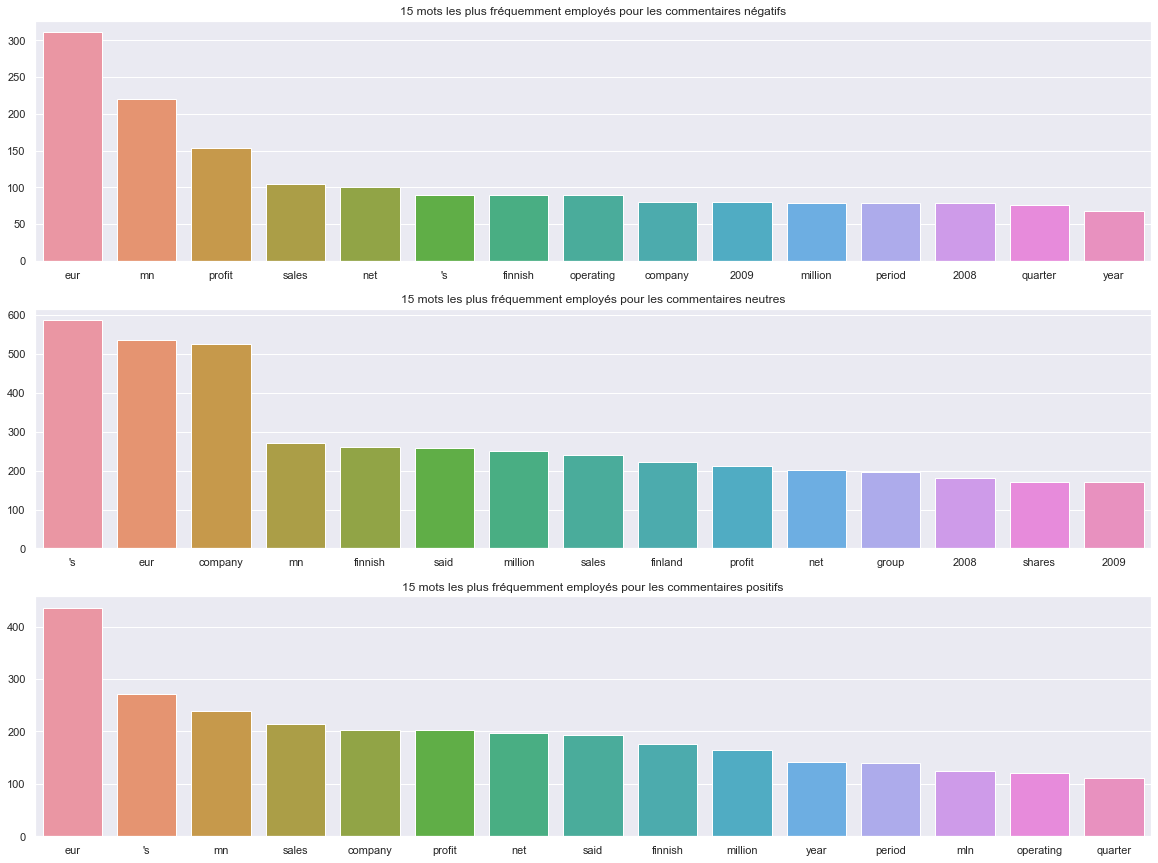

In [9]:
# À supprimer pour histogrammes
large_stopwords = list(stop_words) + list(string.punctuation)

# Messages positifs
chaine_pos = ' '.join(i.lower() for i in df_positive.Sentence) # chaine des phrases positives
dico_pos = dict(Counter(chaine_pos.split())) # dictionnaire avec compteur de chaque mot
[dico_pos.pop(key, None) for key in large_stopwords] # suppression des stopwords et de la ponctuation
dico_pos_sorted = dict(sorted(dico_pos.items(), key=lambda x: x[1], reverse = True)) # tri
# Listes histogramme positif
mots_pos = list(dico_pos_sorted.keys())[:15]
freq_pos = list(dico_pos_sorted.values())[:15]

# Messages négatifs
chaine_neg = ' '.join(i.lower() for i in df_negative.Sentence) 
dico_neg = dict(Counter(chaine_neg.split())) 
[dico_neg.pop(key, None) for key in large_stopwords] 
dico_neg_sorted = dict(sorted(dico_neg.items(), key=lambda x: x[1], reverse = True)) 
# Listes histogramme negatif
mots_neg = list(dico_neg_sorted.keys())[:15]
freq_neg = list(dico_neg_sorted.values())[:15]

# Messages neutres
chaine = ' '.join(i.lower() for i in df_neutral.Sentence) 
dico = dict(Counter(chaine.split())) 
[dico.pop(key, None) for key in large_stopwords] 
dico_sorted = dict(sorted(dico.items(), key=lambda x: x[1], reverse = True)) 
# Listes histogramme neutre
mots = list(dico_sorted.keys())[:15]
freq = list(dico_sorted.values())[:15]


# Histogrammes
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
sns.barplot(x=mots_neg, y=freq_neg)
plt.title('15 mots les plus fréquemment employés pour les commentaires négatifs')
plt.subplot(3,1,2)
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés pour les commentaires neutres')
plt.subplot(3,1,3)
sns.barplot(x=mots_pos, y=freq_pos)
plt.title('15 mots les plus fréquemment employés pour les commentaires positifs')
plt.show()

# Etudier les ponctuations

Est-ce que certaines ponctuations sont plus fréquemment utilisées que d'autres selon le sentiment du message?

In [10]:
# Construction d'un dataframe contenant l'ensemble de la ponctuation
df_punctuation = pd.DataFrame(columns=list(string.punctuation))
punctuation = string.punctuation
pattern = r"[{}]".format(punctuation) # create the pattern
r = re.compile(pattern)
for i in range(df.shape[0]):
    sentence = df.Sentence[i]     
    pointeur = r.findall(sentence)
    current_punct = pd.Series(pointeur).value_counts().index.tolist()
    current_count = pd.Series(pointeur).value_counts().tolist()
    dict_punct = dict(zip(current_punct, current_count))
    df_punctuation = df_punctuation.append(dict_punct, ignore_index=True)
df_punctuation = df_punctuation.fillna(0).astype('int')
df_punctuation['Sentiment'] = df.Sentiment
df_punctuation

<ipython-input-10-0f6bad29ce4b>:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  current_punct = pd.Series(pointeur).value_counts().index.tolist()
<ipython-input-10-0f6bad29ce4b>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  current_count = pd.Series(pointeur).value_counts().tolist()


,!,"""",#,$,%,&,',(,),*,...,\,],^,_,`,{,|,},~,Sentiment
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
5838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
5839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
5840,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral


### Ponctuation par sentiment

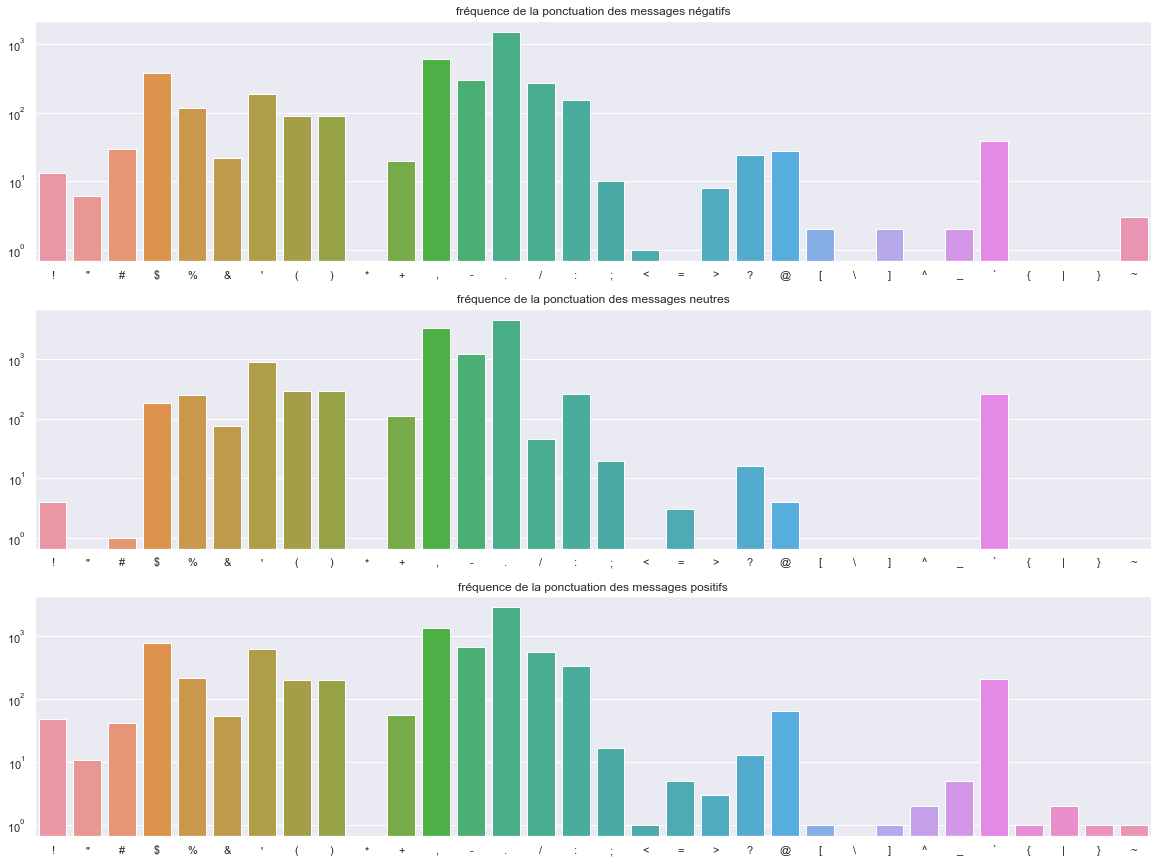

In [11]:
punct_neg = df_punctuation[df_punctuation.Sentiment == "negative"]
punct_pos = df_punctuation[df_punctuation.Sentiment == "positive"]
punct_neut = df_punctuation[df_punctuation.Sentiment == "neutral"]

# Fréquence des différentes ponctuations par sentiment
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
sns.barplot(x = punct_neg.columns[:-1], 
            y = list(punct_neg.loc[:, punct_neg.columns != 'Sentiment'].sum(axis = 0)))
plt.yscale("log") 
plt.title('fréquence de la ponctuation des messages négatifs')

plt.subplot(3,1,2)
sns.barplot(x = punct_neut.columns[:-1], 
            y = list(punct_neut.loc[:, punct_neut.columns != 'Sentiment'].sum(axis = 0)))
plt.yscale("log") 
plt.title('fréquence de la ponctuation des messages neutres')

plt.subplot(3,1,3)
sns.barplot(x = punct_pos.columns[:-1], 
            y = list(punct_pos.loc[:, punct_pos.columns != 'Sentiment'].sum(axis = 0)))
plt.yscale("log") 
plt.title('fréquence de la ponctuation des messages positifs')
plt.show()

Ponctuation inexistante dans le dataset * et \**   
Ponctuation à supprimer car non significative: accolades, ' et ^      

Réflexion: inclure les points et les virgules? 

### Création d'un dataframe incluant la ponctuation

In [12]:
new_df = pd.merge(df, df_punctuation.drop(columns=["'", "^", "{", "}","Sentiment"]), 
                  left_index = True, right_index = True)
print(new_df.shape)
new_df.head()

(5842, 30)


,Sentence,Sentiment,!,"""",#,$,%,&,(,),...,>,?,@,[,\,],_,`,|,~
0,The GeoSolutions technology will leverage Bene...,positive,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,According to the Finnish-Russian Chamber of Co...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Swedish buyout firm has sold its remaining...,neutral,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Etude de l'influence des majuscules dans les tweets sur les sentiments

Est-ce que les messages les messages négatifs comportent plus de lettres majuscules que les messages positifs?

count    5842.000000
mean        6.525505
std         6.576518
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        97.000000
Name: majuscules, dtype: float64


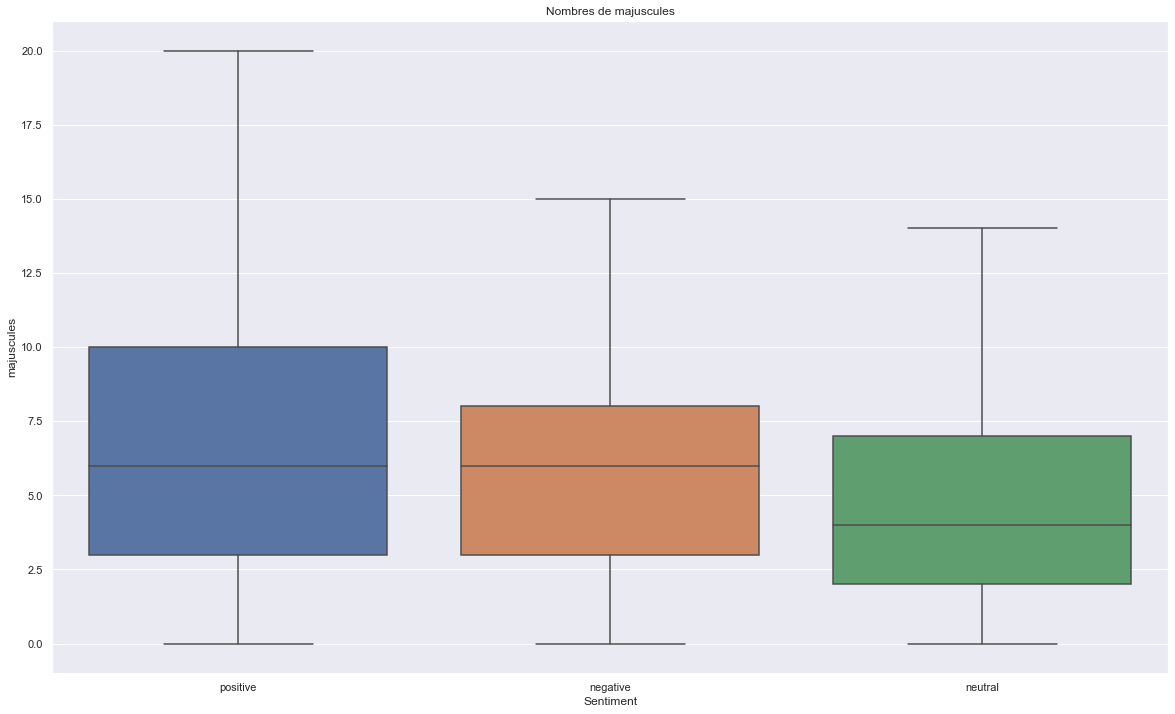

In [13]:
copy_df = df.copy(deep=True)
copy_df['majuscules'] = copy_df.Sentence.apply(lambda text: maj_count(text))
print(copy_df['majuscules'].describe())

plt.figure(figsize = (20,12))
sns.boxplot(x = 'Sentiment', y = 'majuscules', data = copy_df, showfliers = False)
plt.title("Nombres de majuscules")
plt.show()

**Le nombre de majuscules n'a pas réellement d'influence dans son ensemble. Si on regarde que les enchainements d'au moins 2 majuscules consécutives?**

count    5842.000000
mean        1.257446
std         2.268065
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        41.000000
Name: maj+, dtype: float64


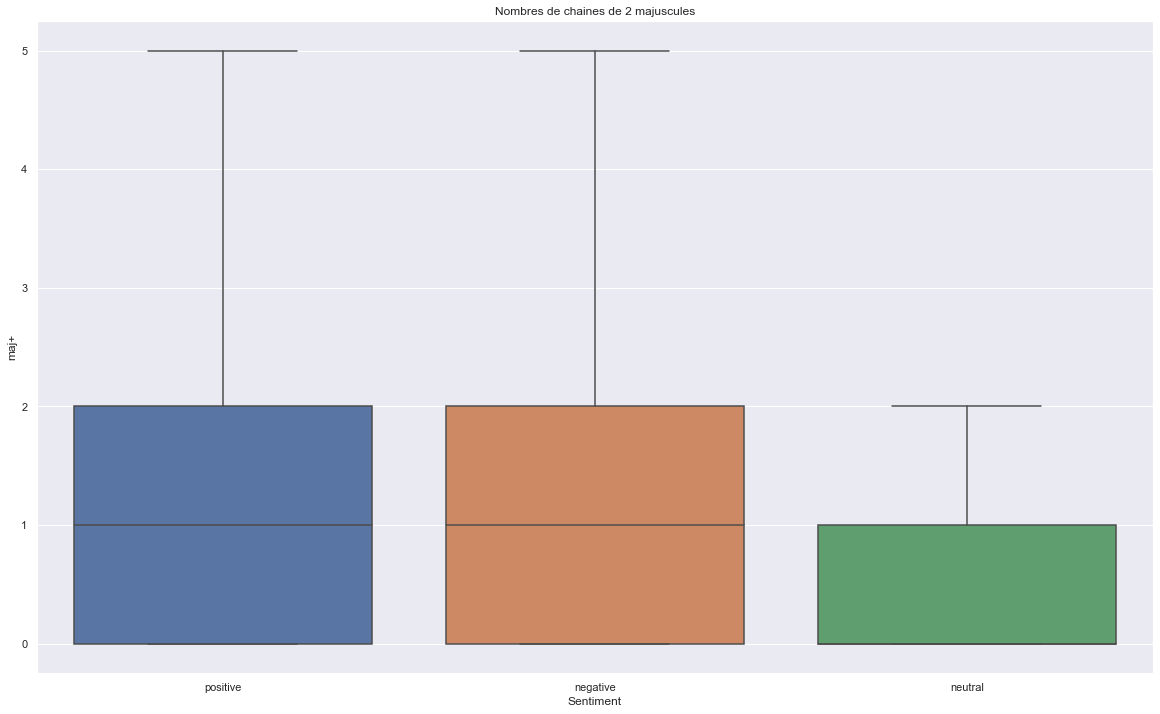

In [14]:
copy_df['maj+'] = copy_df.Sentence.apply(lambda text: maj_count2(text))

print(copy_df['maj+'].describe())

plt.figure(figsize = (20,12))
sns.boxplot(x = 'Sentiment', y = 'maj+', data = copy_df, showfliers = False)
plt.title("Nombres de chaines de 2 majuscules")
plt.show()

**Les majuscules ne sont pas une caractéristique exploitable**

# Enregistrement nouveau dataframe avec ponctuation et classe afinn

In [15]:
new_df.to_csv('finance_sentiment.csv', sep = ",", header = new_df.columns)